In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Q1.Read the data for January. How many columns are there?

In [39]:
df_jan = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df_feb = pd.read_parquet('yellow_tripdata_2023-02.parquet')
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [40]:
df_jan.shape

(3066766, 19)

#### Answer: 19

#### Q2. Computing duration
###### What's the standard deviation of the trips duration in January?

In [41]:
df_jan.tpep_pickup_datetime = pd.to_datetime(df_jan.tpep_pickup_datetime)
df_jan.tpep_dropoff_datetime = pd.to_datetime(df_jan.tpep_dropoff_datetime)

In [42]:
df_jan['duration'] = df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime

In [43]:
df_jan['duration'] = df_jan['duration'].apply(lambda val: val.total_seconds() / 60)

In [44]:
df_jan['duration'].std()

42.594351241920904

In [45]:
df_jan.duration

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: duration, Length: 3066766, dtype: float64

#### Answer B. 42.59

##### Q3. Dropping outliers
###### Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

###### What fraction of the records left after you dropped the outliers?

In [46]:
condition = (df_jan.duration >= 1.0) & (df_jan.duration <= 59.99)

In [47]:
df_jan = df_jan[condition]

In [48]:
df_jan.duration

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: duration, Length: 3009130, dtype: float64

In [53]:
(3009130/3066766)*100

98.12062609276352

##### Answer D: 98%

#### Q4. One-hot encoding
###### Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

###### Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
###### Fit a dictionary vectorizer
###### Get a feature matrix from it
###### What's the dimensionality of this matrix (number of columns)?

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [50]:
df_jan.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71097
trip_distance                0
RatecodeID               71097
store_and_fwd_flag       71097
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71097
airport_fee              71097
duration                     0
dtype: int64

<Axes: >

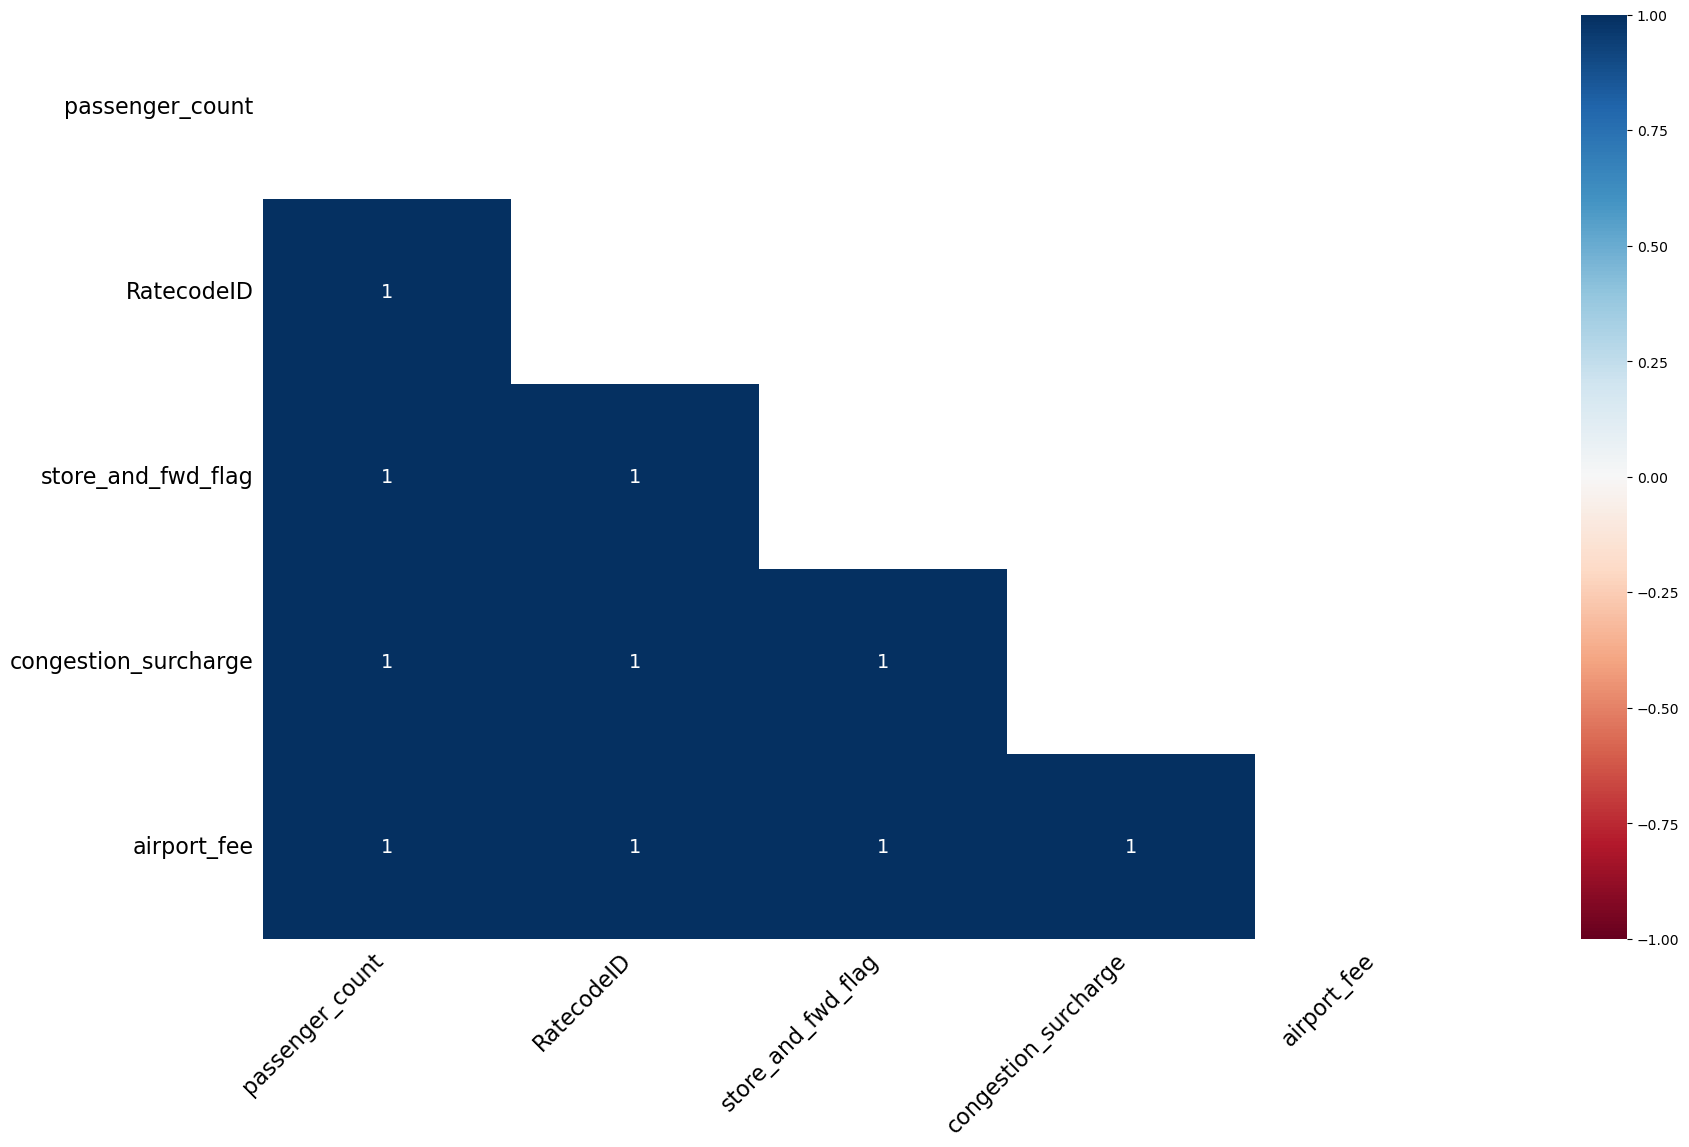

In [51]:
msno.heatmap(df_jan)